# Teleseismic earthquake recording

## 1. Setup

**We start with some input that specifies the earthquake origin time and the station from which we would like to have data.** Further input will be the corner frequencies of the bandpass filter that we apply to the recordings. [Currently, the input is for an M7.3 event in the Zagros mountains.]

In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt

from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client('ETH')
from obspy.signal.cross_correlation import correlate
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")

# UTC origin time and length of record in seconds
t_start = UTCDateTime("2017-11-12T18:18:17.000")
t_length = 1000.0

# minimum and maximum frequency of the bandpass
f_min = 0.01
f_max = 0.10

## 2. Download and bandpass filter data

**We download data from stations GRIMS located in a tunnel in the Swiss Alps.*** Following the download, we correct for the instrument response and bandpass filter the data. Finally, the recordings are plotted.

In [2]:
# download data
ue = client.get_waveforms("CH", "GRIMS", "", channel='HHE', starttime=t_start, endtime=t_start+t_length, attach_response=True)
un = client.get_waveforms("CH", "GRIMS", "", channel='HHN', starttime=t_start, endtime=t_start+t_length, attach_response=True)
uz = client.get_waveforms("CH", "GRIMS", "", channel='HHZ', starttime=t_start, endtime=t_start+t_length, attach_response=True)

# remove instrument response
ue.remove_response(output='DISP')
un.remove_response(output='DISP') 
uz.remove_response(output='DISP') 

# bandpass filter
ue.filter(type='bandpass', freqmin=f_min, freqmax=f_max, corners=4, zerophase=True)
un.filter(type='bandpass', freqmin=f_min, freqmax=f_max, corners=4, zerophase=True)
uz.filter(type='bandpass', freqmin=f_min, freqmax=f_max, corners=4, zerophase=True)

1 Trace(s) in Stream:
CH.GRIMS..HHZ | 2017-11-12T18:18:13.818393Z - 2017-11-12T18:34:59.738393Z | 100.0 Hz, 100593 samples

## 3. Plot data

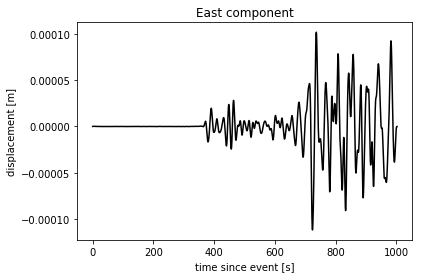

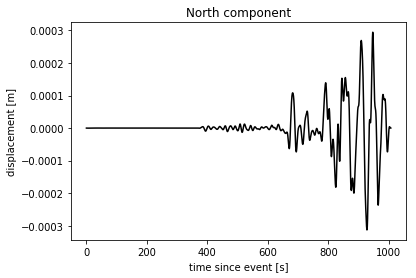

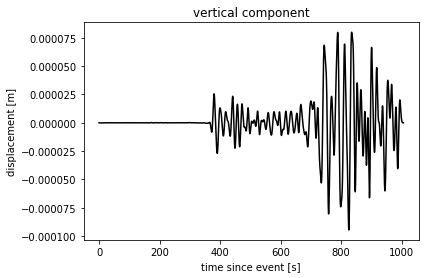

In [3]:
# length of trace
n=len(ue[0].data)
dt=ue[0].stats.delta

t=np.arange(0.0,n*dt,dt)

# plot actual seismograms
plt.plot(t,ue[0].data,'k')
plt.xlabel('time since event [s]')
plt.ylabel('displacement [m]')
plt.title('East component')
plt.show()

# length of trace
n=len(un[0].data)
dt=un[0].stats.delta

t=np.arange(0.0,n*dt,dt)

plt.plot(t,un[0].data,'k')
plt.xlabel('time since event [s]')
plt.ylabel('displacement [m]')
plt.title('North component')
plt.show()

# length of trace
n=len(uz[0].data)
dt=uz[0].stats.delta

t=np.arange(0.0,n*dt,dt)

plt.plot(t,uz[0].data,'k')
plt.xlabel('time since event [s]')
plt.ylabel('displacement [m]')
plt.title('vertical component')
plt.show()

## 3. Compute some theoretical traveltimes

In [47]:
arrivals = model.get_travel_times(source_depth_in_km=10, distance_in_degree=3481.0/111.0)
print(arrivals)

33 arrivals
	P phase arrival at 380.736 seconds
	pP phase arrival at 383.799 seconds
	sP phase arrival at 385.136 seconds
	PP phase arrival at 443.134 seconds
	PP phase arrival at 443.773 seconds
	PP phase arrival at 443.997 seconds
	PP phase arrival at 451.515 seconds
	PP phase arrival at 451.848 seconds
	PcP phase arrival at 554.096 seconds
	S phase arrival at 688.914 seconds
	pS phase arrival at 692.538 seconds
	sS phase arrival at 694.162 seconds
	SP phase arrival at 694.730 seconds
	PS phase arrival at 696.358 seconds
	SP phase arrival at 717.612 seconds
	SP phase arrival at 717.619 seconds
	ScP phase arrival at 777.210 seconds
	PcS phase arrival at 778.473 seconds
	SS phase arrival at 793.700 seconds
	SS phase arrival at 823.631 seconds
	SS phase arrival at 824.019 seconds
	PKiKP phase arrival at 1003.726 seconds
	pPKiKP phase arrival at 1007.172 seconds
	sPKiKP phase arrival at 1008.425 seconds
	ScS phase arrival at 1014.819 seconds
	SKiKP phase arrival at 1215.215 seconds
	PKIK

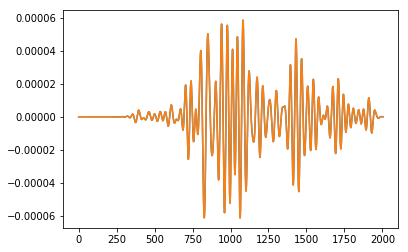

In [37]:
n=len(ue[0].data)
dt=ue[0].stats.delta

t=np.arange(0.0,n*dt,dt)

plt.plot(t,ue[0].data)
plt.show()